In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

from lib.Tensor import Tensor
from lib.NN import MLP, ReLU, MSELoss
from lib.Optimizers import SGD

In [2]:
def make_data(n=1000, plot=False):
    x = np.linspace(-10, 10, n) # 100 samples between -10 and 10

    # generate y = 2x + 1
    y = 2 * x + 1
    # add noise
    y += np.random.normal(5, 5, n)


    # reshape x and y to be column vectors
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    x, y = shuffle(x, y, random_state=0)

    # split into train and test sets
    train_idx, val_idx, test_idx = int(0.6*n), int(0.8*n), int(1.0*n)

    train_x, val_x, test_x = x[:train_idx], x[train_idx:val_idx], x[val_idx:test_idx]
    train_y, val_y, test_y = y[:train_idx], y[train_idx:val_idx], y[val_idx:test_idx]

    # Plot
    if plot:
        plt.scatter(train_x, train_y, label="Training Data")
        plt.scatter(val_x, val_y, label="Validation Data", alpha=0.6)
        plt.scatter(test_x, test_y, label="Test Data", alpha=0.6)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.title('Synthetic Linearly Correlated Data')
        plt.show()  

    # create tensors
    train_inputs = Tensor(train_x, requires_grad=True)
    train_targets = Tensor(train_y, requires_grad=True)

    val_inputs = Tensor(val_x, requires_grad=True)
    val_targets = Tensor(val_y, requires_grad=True)

    test_inputs = Tensor(test_x, requires_grad=True)
    test_targets = Tensor(test_y, requires_grad=True)

    return train_inputs, train_targets, val_inputs, val_targets, test_inputs, test_targets

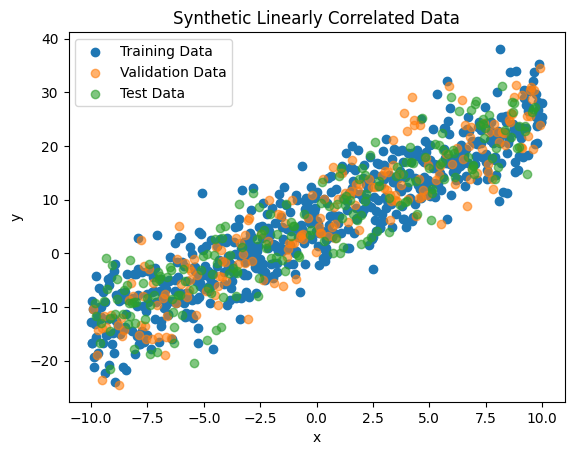

In [3]:
train_inputs, train_targets, val_inputs, val_targets, test_inputs, test_targets = make_data(plot=True)


In [7]:
model = MLP([1, 10, 1], ReLU)
criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=0.001)

In [8]:
train_loss_history = []
val_loss_history = []

epochs = 1000

for epoch in range(epochs):

    # train phase
    model.train() # set model to train mode
    optimizer.zero_grad() # reset gradients

    train_outputs = model(train_inputs) # forward pass
    train_loss = criterion(train_outputs, train_targets) # compute loss
    train_loss.backward() # compute gradients
    optimizer.step() # update parameters
    train_loss_history.append(train_loss.data) # save loss for plotting

    # validation phase
    model.eval() # set model to eval mode
    with Tensor.no_grad():
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_targets)
        val_loss_history.append(val_loss.data)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss.data:.04f} | Val Loss: {val_loss.data:.04f}")


Epoch: 0 | Train Loss: 187.7586 | Val Loss: 221.7751
Epoch: 100 | Train Loss: 44.3966 | Val Loss: 50.5058
Epoch: 200 | Train Loss: 29.8052 | Val Loss: 33.2441
Epoch: 300 | Train Loss: 28.6540 | Val Loss: 31.9124
Epoch: 400 | Train Loss: 27.6623 | Val Loss: 30.7709
Epoch: 500 | Train Loss: 26.8237 | Val Loss: 29.7894
Epoch: 600 | Train Loss: 26.1420 | Val Loss: 28.9967
Epoch: 700 | Train Loss: 25.6252 | Val Loss: 28.3672
Epoch: 800 | Train Loss: 25.2369 | Val Loss: 27.8703
Epoch: 900 | Train Loss: 24.9416 | Val Loss: 27.4938


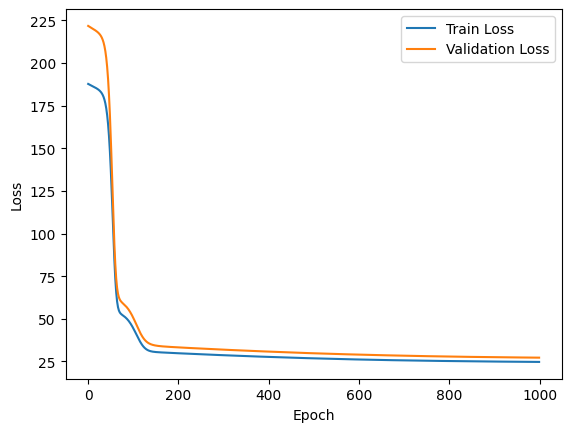

In [9]:
plt.plot(train_loss_history, label="Train Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()